## <span style="color:#c1502e">Exploring Worldwide Meat Production Trends (1961-2021).</span>

### <span style="color:#c94c4c">In this project we investigate worldwide meat production spanning 6 decades from 1961 to 2021. By analyzing the data, we aim to uncover trends, patterns, and shifts in global meat production over time. </span>

####  <span style="color:#563f46">During our analysis we will address the following inquiries:</span>
#####  <span style="color:#563f46">1. How has meat production evolved over the past 6 decades?
#####  <span style="color:#563f46">2. How is meat production distributed across continents in 2021?
#####  <span style="color:#563f46">3. How did the distribution of the highest meat types vary among countries in 2021?
##### <span style="color:#563f46"> 4. What is the least produced type of meat, and how did its distribution vary among countries in 2021? Which country emerged as the highest producer of this type of meat?
##### <span style="color:#563f46"> 5. How did the distribution of this type of meat vary in this country over time?
##### <span style="color:#563f46"> 6. How are the other types distributed in this country?
##### Bonus: How has meat production evolved in Iceland over the past six decades?</span>


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Gabon\Desktop\food\food.csv")


In [179]:
df.head()

,Country,Code,Year,Game,Horse,Camel,Sheep and Goat,Beef and buffalo,Pork,Poultry
0,Afghanistan,AFG,1961,4000.00,NaN,3600.00,73220.00,43000.00,NaN,5600.00
1,Afghanistan,AFG,1962,4000.00,NaN,4030.74,72375.00,45800.00,NaN,6000.00
2,Afghanistan,AFG,1963,5000.00,NaN,5031.36,75530.00,47250.00,NaN,6160.00
3,Afghanistan,AFG,1964,5000.00,NaN,4680.00,79750.00,48000.00,NaN,6400.00
4,Afghanistan,AFG,1965,6000.00,NaN,4320.00,84375.00,48700.00,NaN,6800.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              14090 non-null  object 
 1   Code                                                                11469 non-null  object 
 2   Year                                                                14090 non-null  int64  
 3   Meat, game | 00001163 || Production | 005510 || tonnes              5833 non-null   float64
 4   Meat, horse | 00001097 || Production | 005510 || tonnes             6774 non-null   float64
 5   Meat, camel | 00001127 || Production | 005510 || tonnes             3535 non-null   float64
 6   Meat, sheep and goat | 00001807 || Production | 005510 || tonnes    13508 non-null  float64
 7   Meat, beef an

In [12]:
df.isnull().sum()

Entity                                                                    0
Code                                                                   2621
Year                                                                      0
Meat, game | 00001163 || Production | 005510 || tonnes                 8257
Meat, horse | 00001097 || Production | 005510 || tonnes                7316
Meat, camel | 00001127 || Production | 005510 || tonnes               10555
Meat, sheep and goat | 00001807 || Production | 005510 || tonnes        582
Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes      280
Meat, pig | 00001035 || Production | 005510 || tonnes                  1192
Meat, poultry | 00001808 || Production | 005510 || tonnes               136
dtype: int64

In [22]:
df.duplicated().sum()

0

In [21]:
df.rename(columns = {'Meat, game | 00001163 || Production | 005510 || tonnes':'Game',
                     'Meat, horse | 00001097 || Production | 005510 || tonnes':'Horse',
                     'Meat, camel | 00001127 || Production | 005510 || tonnes':'Camel',
                     'Meat, sheep and goat | 00001807 || Production | 005510 || tonnes':'Sheep and Goat', 
                     'Meat, pig | 00001035 || Production | 005510 || tonnes':'Pork',
                     'Meat, poultry | 00001808 || Production | 005510 || tonnes':'Poultry',
                     'Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes':'Beef and buffalo',
                     'Entity':'Country'},inplace = True) 
df.head()

,Country,Code,Year,Game,Horse,Camel,Sheep and Goat,Beef and buffalo,Pork,Poultry
0,Afghanistan,AFG,1961,4000.0,NaN,3600.00,73220.0,43000.0,NaN,5600.0
1,Afghanistan,AFG,1962,4000.0,NaN,4030.74,72375.0,45800.0,NaN,6000.0
2,Afghanistan,AFG,1963,5000.0,NaN,5031.36,75530.0,47250.0,NaN,6160.0
3,Afghanistan,AFG,1964,5000.0,NaN,4680.00,79750.0,48000.0,NaN,6400.0
4,Afghanistan,AFG,1965,6000.0,NaN,4320.00,84375.0,48700.0,NaN,6800.0


### <span style="color:#c1502e">In the following chart, Pork and Poultry emerge as the top produced meat types in the present, with Poultry showing a notable surge in popularity starting in the late 1980s and continuing to the present.</span>

<Figure size 1000x600 with 0 Axes>

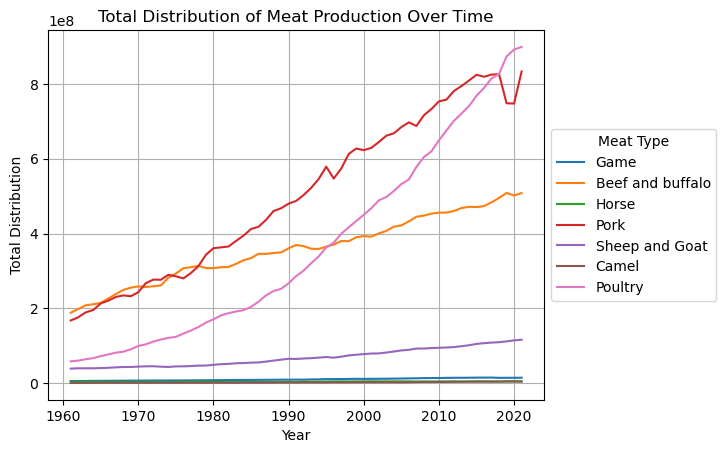

In [821]:
tot_distribution_over_time = df.groupby('Year')[['Game', 'Beef and buffalo', 'Horse', 'Pork', 'Sheep and Goat', 'Camel', 'Poultry']].sum()

plt.figure(figsize=(10, 6))
tot_distribution_over_time.plot(kind='line')
plt.title('Total Distribution of Meat Production Over Time')
plt.xlabel('Year')
plt.ylabel('Total Distribution')
plt.grid(True)
plt.legend(title='Meat Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [835]:
region = ['Africa', 'Europe','Asia','South America','North America','Central America','Oceania'] 

region_distr =  df[(df['Country']).isin(region) & (df['Year'] == 2021)]
regiong = region_distr.groupby(['Country'])[['Game','Beef and buffalo', 'Horse','Pork','Sheep and Goat','Camel', 'Poultry']].sum().reset_index()
region_sorted = regiong.sort_values(by='Country', ascending=False)
region_sorted



,Country,Game,Beef and buffalo,Horse,Pork,Sheep and Goat,Camel,Poultry
5,South America,59753.70,15900163.00,79229.10,6822662.00,334859.30,0.00,23359922.00
4,Oceania,442683.16,2698071.00,18279.15,580355.25,1129858.00,0.00,1593005.40
3,North America,266969.90,17074080.00,123530.75,17094292.00,235237.31,0.00,30280832.00
2,Europe,14224.39,9688021.00,59475.03,30832516.00,1174375.90,115.00,20957332.00
1,Asia,18887.25,23564290.00,397375.00,63027616.00,10048325.00,256711.60,53125212.00
0,Africa,1208008.80,7041179.50,17889.22,2014684.60,3434959.00,345818.12,7650363.00


### <span style="color:#c1502e">In this chart, we can observe Asia dominating the meat production industry, followed by Europe and North America. Additionally, Europeans show a preference for pork over poultry.</span>

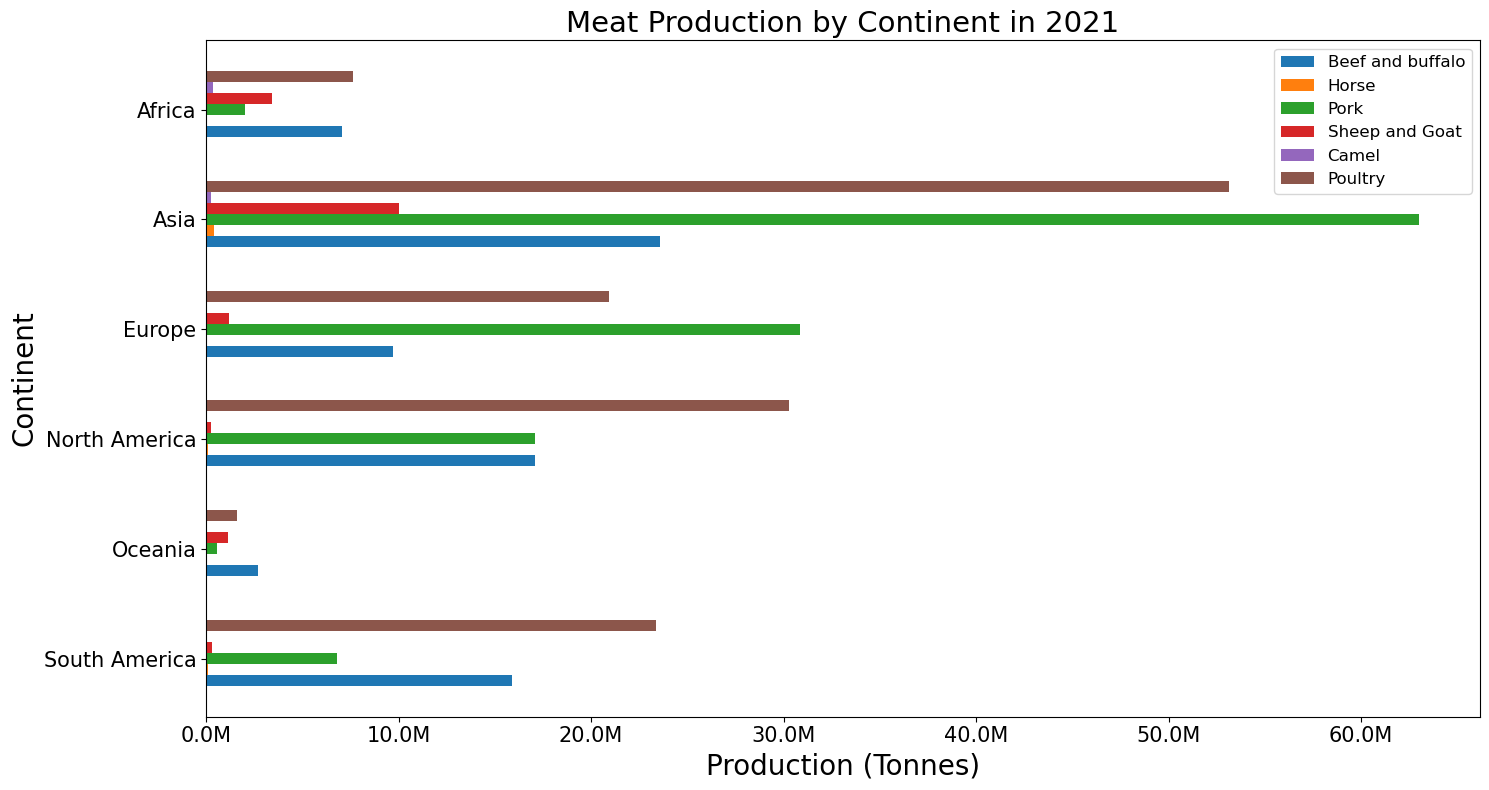

In [827]:
continents = region_sorted['Country']
beef = region_sorted['Beef and buffalo']
horse = region_sorted['Horse']
pork = region_sorted['Pork']
sheep_goat = region_sorted['Sheep and Goat']
camel = region_sorted['Camel']
poultry = region_sorted['Poultry']

fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.1
index = range(len(continents))

plt.barh(index, beef, bar_width, label='Beef and buffalo')
plt.barh([i + bar_width for i in index], horse, bar_width, label='Horse')
plt.barh([i + 2*bar_width for i in index], pork, bar_width, label='Pork')
plt.barh([i + 3*bar_width for i in index], sheep_goat, bar_width, label='Sheep and Goat')
plt.barh([i + 4*bar_width for i in index], camel, bar_width, label='Camel')
plt.barh([i + 5*bar_width for i in index], poultry, bar_width, label='Poultry')

plt.ylabel('Continent', size = 20)
plt.xlabel('Production (Tonnes)', size = 20)
plt.title('Meat Production by Continent in 2021', size = 21)
plt.yticks([i + 2*bar_width for i in index], continents, size = 15)
plt.xticks(size = 15)
plt.legend(fontsize='large')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x * 1e-6)))

plt.tight_layout()
plt.show()

In [836]:
dist_21 = df[df['Year'] == 2021]

tot_distribution21 = dist_21[['Game','Beef and buffalo', 'Horse','Pork','Sheep and Goat','Camel', 'Poultry']].sum()
display(tot_distribution)

Game                14815263.22
Beef and buffalo   508299177.20
Horse                4861994.57
Pork               833087921.76
Sheep and Goat     116303861.91
Camel                4715388.96
Poultry            898601218.37
dtype: float64

### <span style="color:#c1502e">On a global scale in 2021, Poultry and Pork dominate most of the market share, followed by beef and sheep. Other types of meat appear to have less significant market share, with camel being the least produced type.</span>

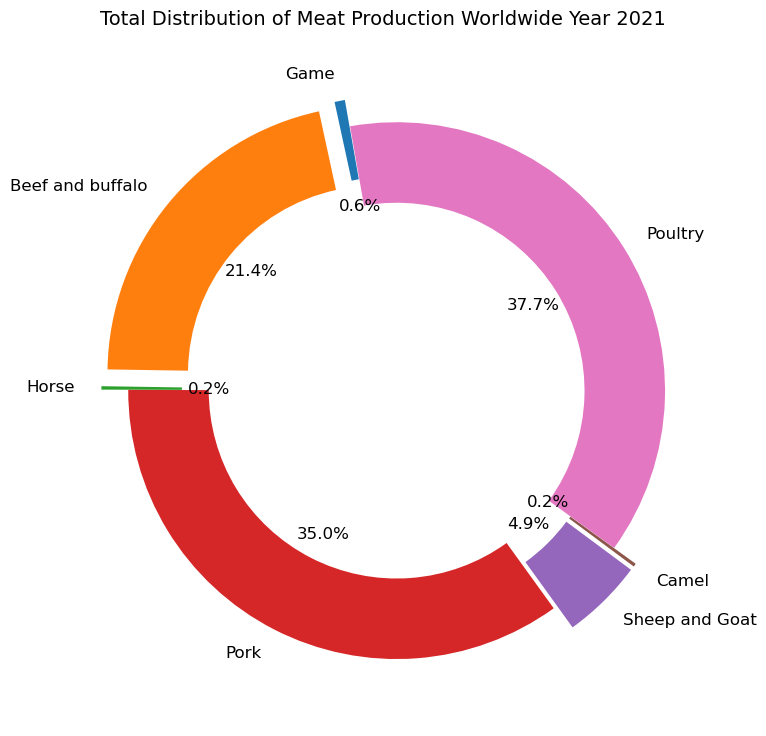

In [837]:
plt.figure(figsize=(8, 7)) 

tot_distribution21.plot(kind='pie', autopct='%1.1f%%', startangle=100, fontsize=12, explode=(0.1, 0.1, 0.1, 0, 0.1, 0.1, 0),wedgeprops=dict(width=0.3)) 
plt.axis('equal')  
plt.title('Total Distribution of Meat Production Worldwide Year 2021', fontsize=14)
plt.subplots_adjust(top=1.1)


In [830]:
excluded_countries = ['World','Upper-middle-income countries','Africa', 'Africa (FAO)','Asia', 'Asia (FAO)',
                     'Low Income Food Deficit Countries (FAO)', 'Low-income countries',
                       'Lower-middle-income countries','Lower-middle-income countries','Net Food Importing Developing Countries (FAO)'
                        ,'Least Developed Countries (FAO)','Northern Africa (FAO)','Western Asia (FAO)','Western Asia (FAO)',
                    'High-income countries', 'Eastern Africa (FAO)','Land Locked Developing Countries (FAO)','Eastern Asia (FAO)',
                     'Western Africa (FAO)','Middle Africa (FAO)','Southern Asia (FAO)','Central Asia (FAO)','Americas (FAO)',
                     'North America','Northern America (FAO)','South America','South America (FAO)','Europe (FAO)','Europe',
                     'European Union (27) (FAO)','European Union (27)','South-eastern Asia (FAO)','Eastern Europe (FAO)',
                     'Central America (FAO)','Western Europe (FAO)','Southern Europe (FAO)','Northern Europe (FAO)','Southern Africa (FAO)',
                     'China (FAO)']

poul =  df[(df['Year'] == 2021) & (~df['Country'].isin(excluded_countries))]

ct = poul.groupby(['Country', 'Year'])
top_cam = ct['Poultry'].sum()
sort_cam = top_cam.sort_values(ascending = False)
cam_prod = pd.DataFrame({'Country':sort_cam.index.get_level_values(0),
                         'Year': sort_cam.index.get_level_values(1),
                         'Poultry':sort_cam.values})
poul_2021 = cam_prod[cam_prod['Year'] == 2021]



### <span style="color:#c1502e">Examining the distribution of poultry in 2021, we observe China, USA, and Brazil leading production by far, each surpassing 15 million tonnes.</span>

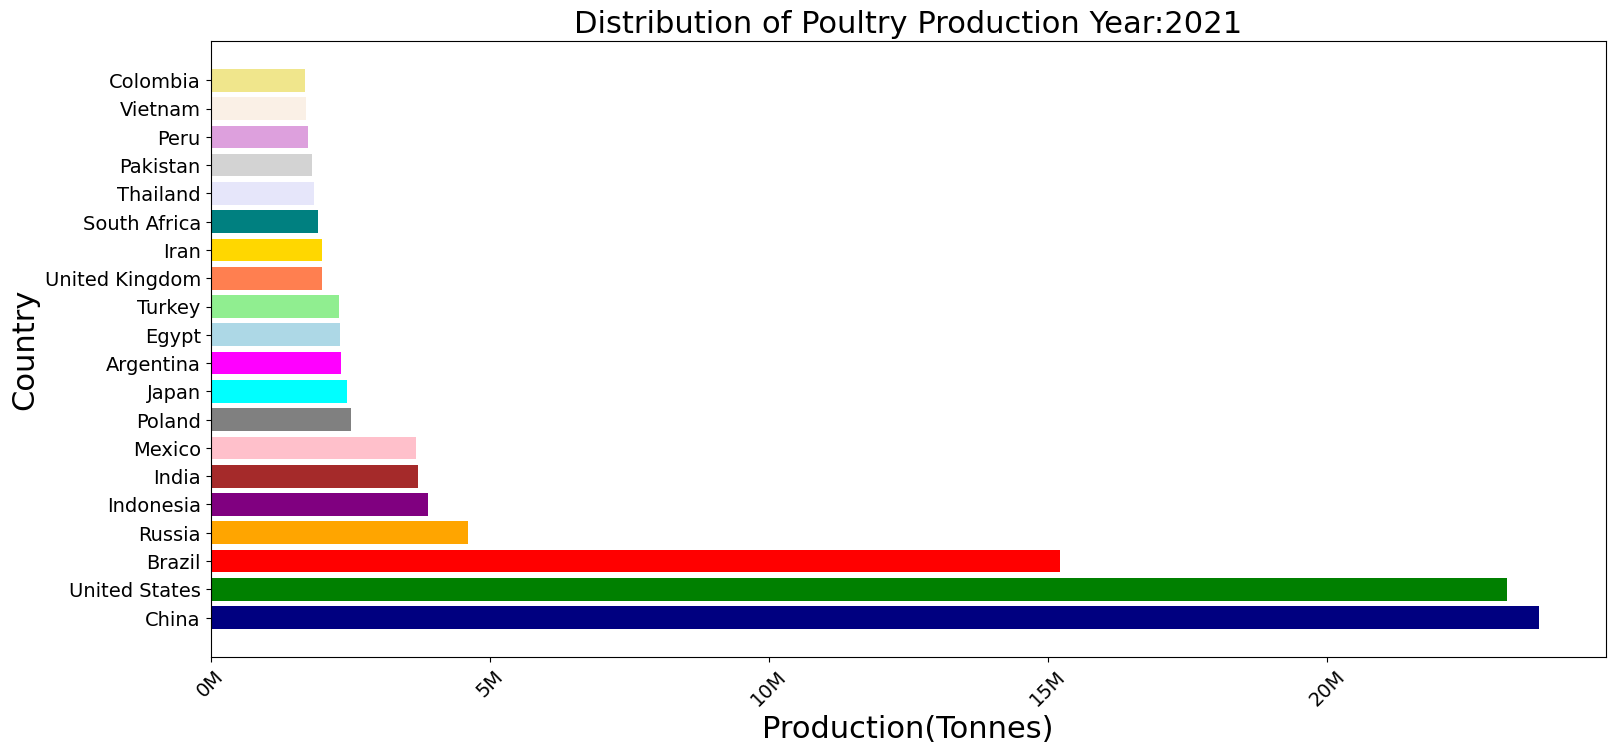

In [349]:
def conv(x, pos):
    return '%1.0fM' % (x * 1e-6)

plt.figure(figsize=(18,8))

colors = ['navy', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lightblue', 'lightgreen', 'coral', 'gold', 'teal', 'lavender', 'lightgray', 'plum', 'linen', 'khaki']

plt.barh(poul_2021.head(20)['Country'], poul_2021.head(20)['Poultry'], color = colors)

plt.title('Distribution of Poultry Production Year:2021', fontsize= 22)
plt.xlabel('Production(Tonnes)', fontsize=22)
plt.ylabel('Country', fontsize=22)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.gca().xaxis.set_major_formatter(conv)
plt.show()

In [57]:
pd.options.display.float_format = '{:.2f}'.format

In [174]:
df.head()

,Country,Code,Year,Game,Horse,Camel,Sheep and Goat,Beef and buffalo,Pork,Poultry
0,Afghanistan,AFG,1961,4000.00,NaN,3600.00,73220.00,43000.00,NaN,5600.00
1,Afghanistan,AFG,1962,4000.00,NaN,4030.74,72375.00,45800.00,NaN,6000.00
2,Afghanistan,AFG,1963,5000.00,NaN,5031.36,75530.00,47250.00,NaN,6160.00
3,Afghanistan,AFG,1964,5000.00,NaN,4680.00,79750.00,48000.00,NaN,6400.00
4,Afghanistan,AFG,1965,6000.00,NaN,4320.00,84375.00,48700.00,NaN,6800.00


In [832]:
evo =  df[(df['Year']) & (~df['Country'].isin(excluded_countries)) & (df['Country'].isin(cam_sort_df['Country'].head(10)))]
        
camg = evo.groupby(['Country', 'Year'])['Camel'].sum().reset_index()
cam_sort_line = camg.sort_values(ascending = False, by='Camel')


### <span style="color:#c1502e">With camel being the least produced type of meat, let's examine deeper and understand its distribution over the past six decades.</span>

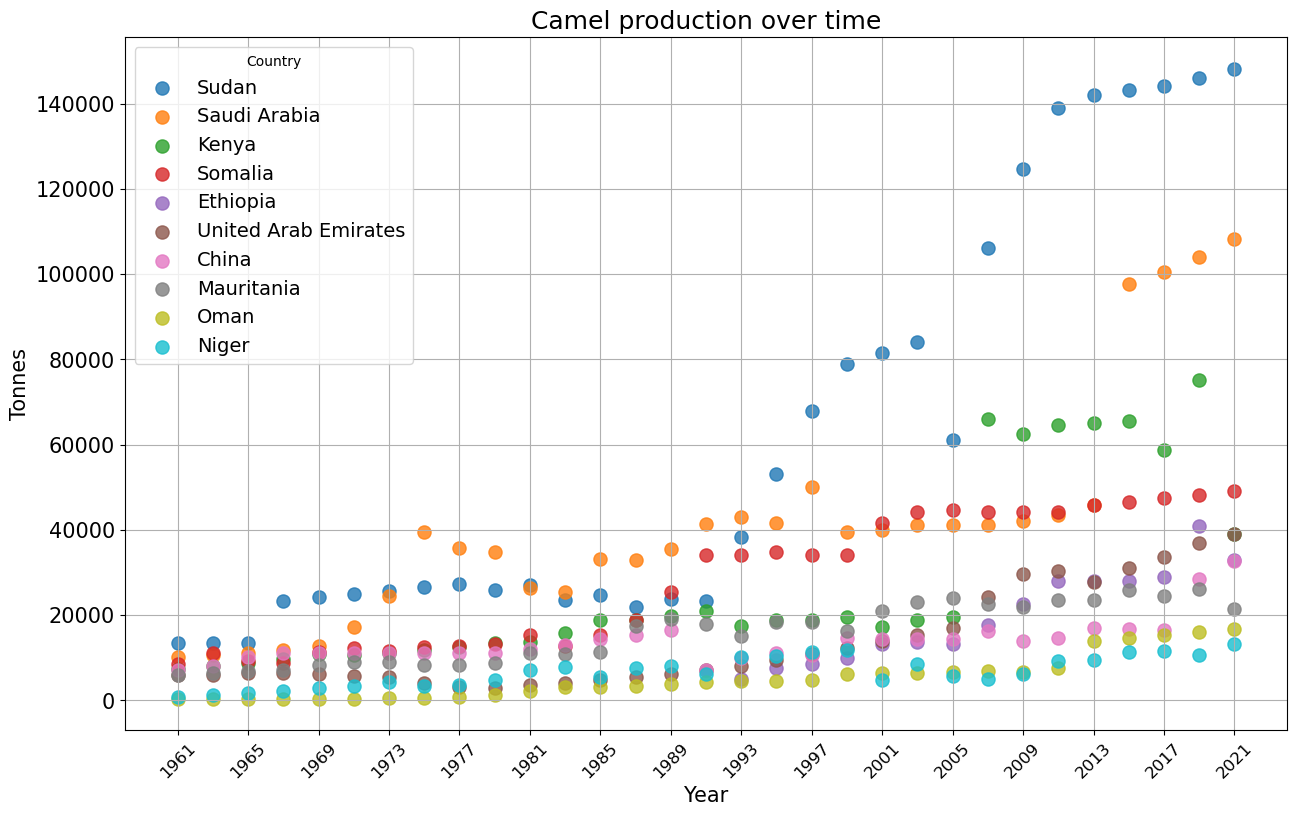

In [839]:
plt.figure(figsize=(15, 9))

for country in cam_sort_line['Country'].unique():
    country_data = cam_sort_line[(cam_sort_line['Country'] == country)]
    plt.scatter(country_data['Year'], country_data['Camel'], label=country, s=90, alpha = 0.8)  

plt.title('Camel production over time', size = 18)
plt.xlabel('Year', size = 15)
plt.ylabel('Tonnes', size = 15)
plt.xticks(np.arange(cam_sort_line['Year'].min(), cam_sort_line['Year'].max() + 1, 4), size = 12, rotation = 45)  
plt.yticks(size = 15)
plt.legend(title = 'Country',loc='upper left',prop={'size': 14})
plt.grid(True)
plt.show()

In [833]:
cam21 =  df[(df['Year'] == 2021) & (~df['Country'].isin(excluded_countries))]
        
camsum = cam21.groupby(['Country'])['Camel'].sum()
cam_sort = camsum.sort_values(ascending = False)
cam_sort_df = pd.DataFrame({'Country':cam_sort.index,
                         'Camel':cam_sort.values})


### <span style="color:#c1502e">Currently, Sudan and Saudi Arabia are the top producers of camel meat, with Somalia following at a notable distance.</span>

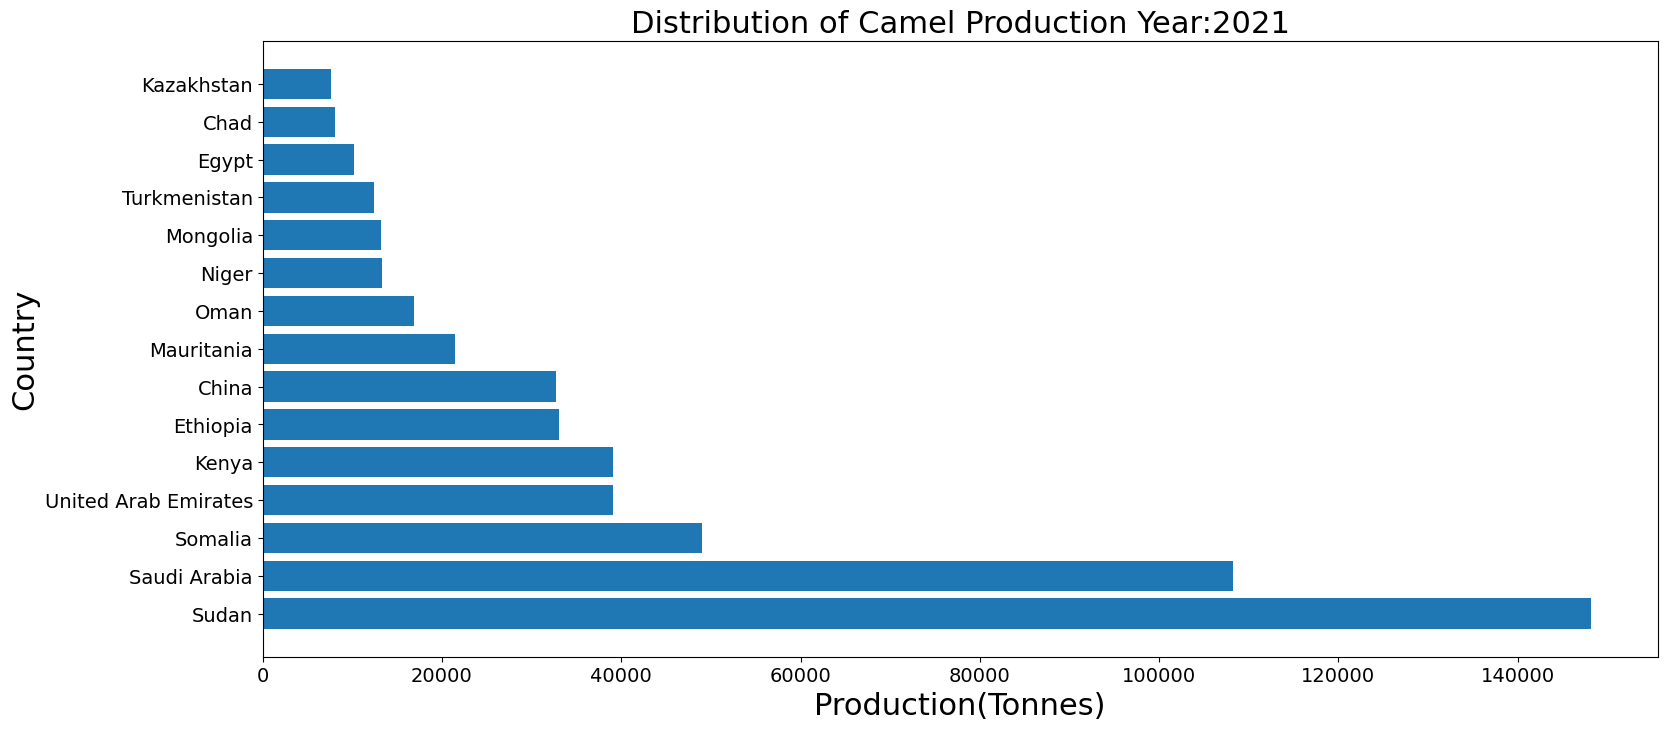

In [829]:
plt.figure(figsize=(18,8))

plt.barh(cam_sort_df.head(15)['Country'], cam_sort_df.head(15)['Camel'])
plt.title('Distribution of Camel Production Year:2021', fontsize= 22)
plt.xlabel('Production(Tonnes)', fontsize=22)
plt.ylabel('Country', fontsize=22)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [834]:
sudan = ['Sudan', 'Sudan (former)']

sudan_distr =  df[(df['Country']).isin(sudan)]

sudsum = sudan_distr.groupby(['Country', 'Year'])['Camel'].sum().reset_index()
sud_over = sudsum.sort_values(by='Year')



### <span style="color:#c1502e">In this chart, we can observe Sudan's camel production experiencing a significant surge in the early 1990s.</span>

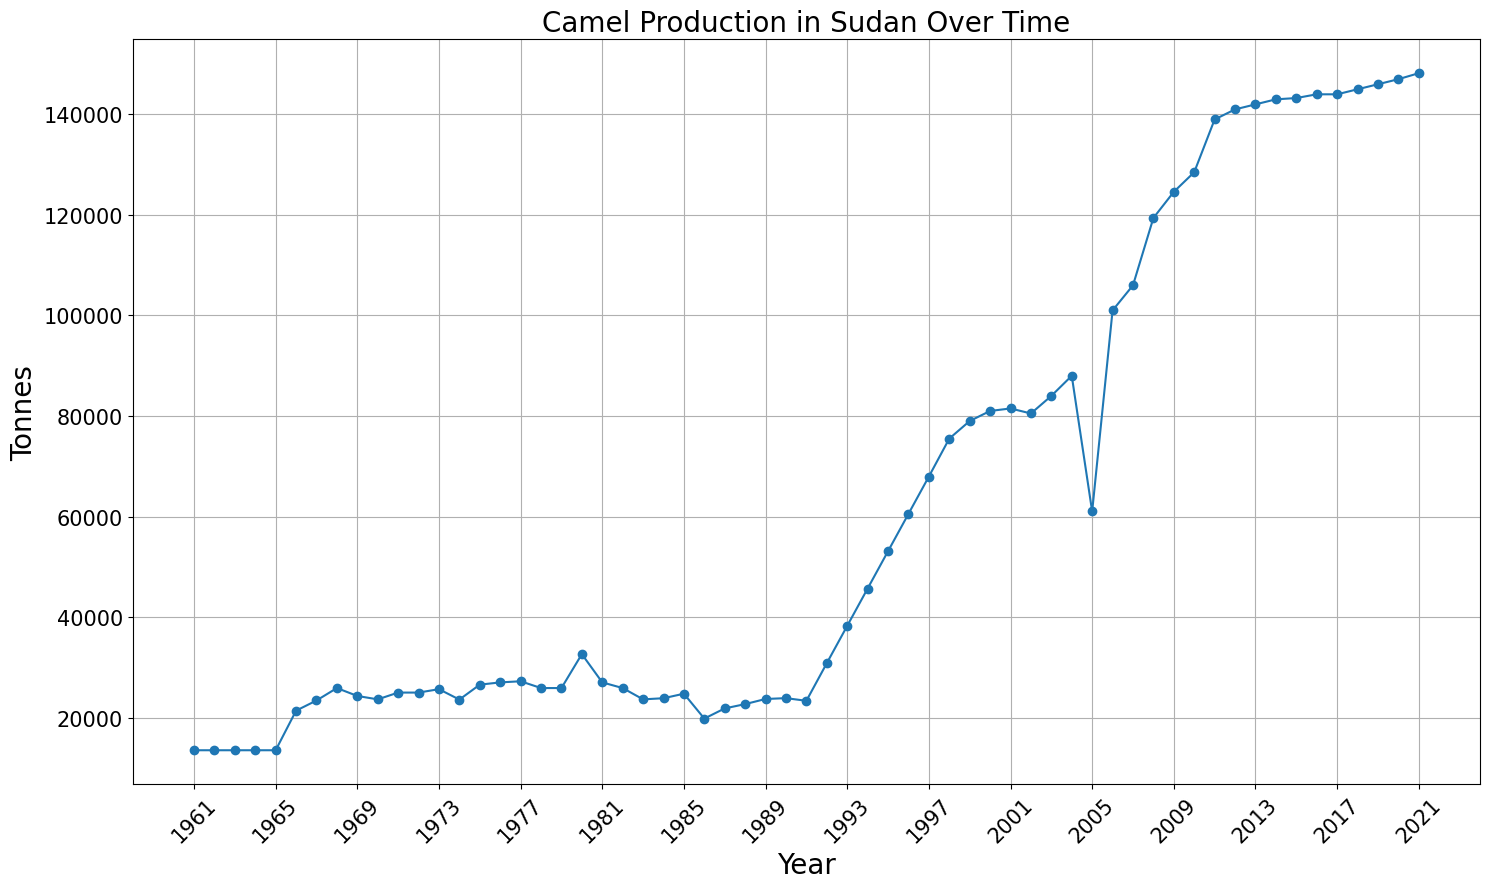

In [596]:
plt.figure(figsize=(15, 9))


plt.plot(sud_over['Year'], sud_over['Camel'], marker='o', linestyle='-')
plt.title('Camel Production in Sudan Over Time', size = 20)
plt.xlabel('Year', size = 20)
plt.ylabel('Tonnes', size = 20)
plt.xticks(np.arange(sud_over['Year'].min(), sud_over['Year'].max() + 1, 4), size = 15, rotation = 45)  
plt.yticks(size = 15)
plt.grid(True)
plt.tight_layout()
plt.show()


### <span style="color:#c1502e">Despite camel gaining impressive popularity, it only comprises 14.8% of Sudan's meat production in 2021, with beef and sheep sharing the majority of the market share.</span>

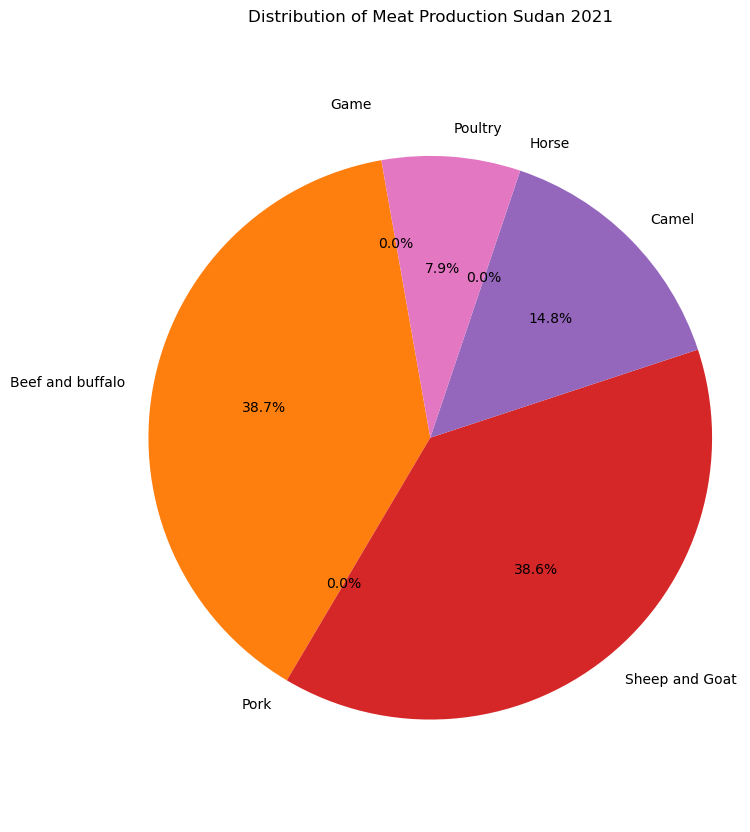

In [754]:
df.loc[df['Country'].isin(['Sudan', 'Sudan (former)']), 'Country'] = 'Sudan'
sudan_distr = df[(df['Country'] == 'Sudan') & (df['Year'] == 2021)]

totsud = sudan_distr.groupby(['Country', 'Year'])[['Game','Beef and buffalo', 'Pork','Sheep and Goat','Camel','Horse', 'Poultry']].sum()

plt.figure(figsize=(8, 8))
labels = totsud.columns
sizes = totsud.values.flatten()
explode = (0.1, 0, 0, 0, 0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  startangle=100)
plt.title('Distribution of Meat Production Sudan 2021')
plt.axis('equal')
plt.subplots_adjust(top=1.1)
plt.show()

### <span style="color:#034f84"> Iceland has a long history of sheep production, but from the early 1990s, it had to make space for the emerging industries.</span>

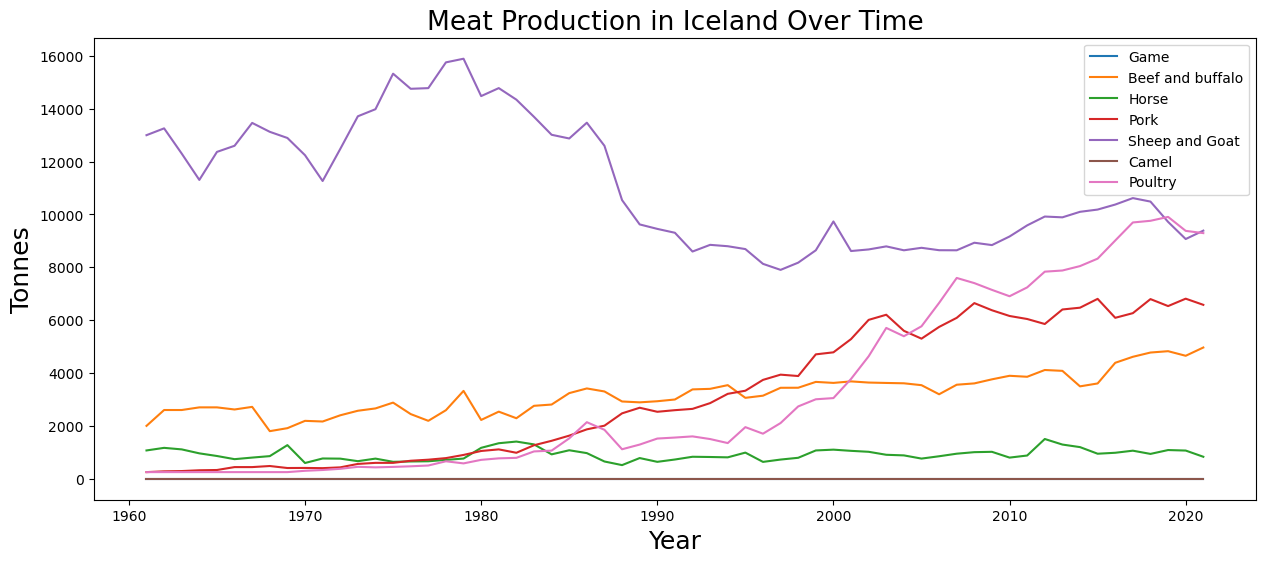

In [695]:
ice = df[df['Country'] == 'Iceland']

tot_ice = ice.groupby(['Country', 'Year'])[['Game','Beef and buffalo', 'Horse','Pork','Sheep and Goat','Camel', 'Poultry']].sum()


plt.figure(figsize=(15, 6))
for col in tot_ice.columns:
    plt.plot(tot_ice.index.get_level_values('Year'), tot_ice[col], label=col,linewidth=1.5)
plt.title('Meat Production in Iceland Over Time', size = 19)
plt.xlabel('Year', size = 18)
plt.ylabel('Tonnes', size = 18)
plt.legend()
plt.show()
